In [248]:
%load_ext autoreload
%autoreload 2
import sys

# instead of creating a package using setup.py or building from a docker/singularity file,
# import the sister directory of src code to be called on in notebook.
# This keeps the notebook free from code to only hold visualizations and is easier to test
# It also helps keep the state of variables clean such that cells aren't run out of order with a mysterious state
sys.path.append("..")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [249]:
import os
import pandas as pd
import numpy as np
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [250]:
stations_df = pd.read_csv(
    "/home/aevans/nwp_bias/src/landtype/data/first_paper_stations.csv"
)

In [251]:
def create_transposed_dataframe():
    path_to_data = "/home/aevans/nwp_bias/src/landtype/data/GFS_buffer_lulc_2023/"
    df = pd.DataFrame()

    for i in np.arange(1, 11):
        lulc = pd.read_csv(f"{path_to_data}/Extract_GFS_{i}.csv")
        lulc = lulc[["VALUE", "COUNT"]].copy()
        lulc.reset_index(inplace=True, drop=True)
        # Repeat the station name to match the length of the lulc dataframe
        # station_name = stations_df['stid'].iloc[i-1]
        # lulc['station'] = station_name
        lulc.reset_index(inplace=True)
        lulc_transposed = lulc.set_index("VALUE").T
        lulc_transposed = lulc_transposed.iloc[1:3]

        # Concatenate each transposed DataFrame
        df = pd.concat([df, lulc_transposed], ignore_index=True, axis=0)

    df.fillna(0, inplace=True)
    df = df.set_index(stations_df["stid"].values)
    df["sum"] = df.sum(axis=1)

    return df

In [252]:
# Define a custom autopct function for larger font size
def autopct_large_font(pct):
    return f"{pct:.1f}%" if pct > 0 else ""

In [253]:
lulc_df = create_transposed_dataframe()
lulc_df

VALUE,11,21,22,23,24,31,41,42,43,52,71,81,82,90,95,sum
ANDE,21097,37154,5759,1313,228,649,495663,12128,91004,359,670,110743,809,6453,992,785021
BUFF,21924,77914,173121,179202,54336,3784,36981,547,1340,480,480,80851,30670,112263,5325,779218
ESSX,194590,27793,17905,2953,325,1234,110362,79774,111562,2336,3004,149075,24927,50576,8642,785058
GABR,55088,16612,11461,2186,380,1083,246518,214956,88377,5559,4552,7190,1869,127020,2213,785064
GROV,3138,40437,12928,1342,121,775,340665,32071,104570,1323,2538,154523,63889,23707,3041,785068
HERK,6613,51332,26075,11859,2615,1301,282992,7501,37488,424,1410,277523,47869,27176,2868,785046
LOUI,61195,26723,17328,4155,688,2215,96629,24110,80672,4979,4838,86815,40745,139605,14838,605535
MANH,125792,36385,67934,241150,281912,865,3974,2,13,123,1066,26,67,2903,22855,785067
SCIP,39831,40415,20523,3052,341,219,157591,4292,14170,178,426,99925,370443,32357,1309,785072
VOOR,4530,83563,80041,32006,11991,1275,215914,27778,106735,1581,2978,144821,7875,59016,4936,785040


In [254]:
# Sum each column
column_sums = lulc_df.sum()
column_sums

VALUE
11      533798
21      438328
22      433075
23      479218
24      352937
31       13400
41     1987289
42      403159
43      635931
52       17342
71       21962
81     1111492
82      589163
90      581076
95       67019
sum    7665189
dtype: int64

In [255]:
if "sum" in column_sums:
    row_percentages = (column_sums / column_sums.iloc[-1]) * 100
    column_sums = column_sums.drop("sum")

In [256]:
row_filtered = column_sums[row_percentages > 1]

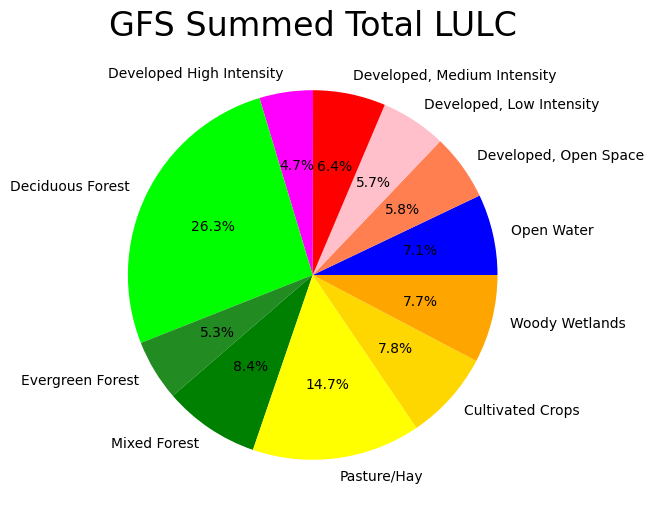

In [257]:
# Map labels and colors for the current row
labels = [
    descripdict.get(int(val), f"Unknown {int(val)}") for val in row_filtered.keys()
]
row_colors = [colordict.get(int(val), "gray") for val in row_filtered.keys()]


# Plot the pie chart with filtered data
plt.figure(figsize=(6, 6))
plt.pie(row_filtered, labels=labels, colors=row_colors, autopct=autopct_large_font)
plt.title(f"GFS Summed Total LULC", fontsize=24)
plt.show()

In [258]:
# Define color, legend, and label mappings
colors = [
    "black",
    "blue",
    "white",
    "coral",
    "pink",
    "red",
    "magenta",
    "gray",
    "lime",
    "forestgreen",
    "green",
    "olive",
    "brown",
    "slategray",
    "darkorchid",
    "plum",
    "indigo",
    "purple",
    "yellow",
    "gold",
    "orange",
    "cyan",
]

legend = np.array(
    [
        0,
        11,
        12,
        21,
        22,
        23,
        24,
        31,
        41,
        42,
        43,
        45,
        51,
        52,
        71,
        72,
        73,
        74,
        81,
        82,
        90,
        95,
    ]
)

leg_str = [
    "No Data",
    "Open Water",
    "Perennial Ice/Snow",
    "Developed, Open Space",
    "Developed, Low Intensity",
    "Developed, Medium Intensity",
    "Developed High Intensity",
    "Barren Land (Rock/Sand/Clay)",
    "Deciduous Forest",
    "Evergreen Forest",
    "Mixed Forest",
    "Forest/Shrub",
    "Dwarf Scrub",
    "Shrub/Scrub",
    "Grassland/Herbaceous",
    "Sedge/Herbaceous",
    "Lichens",
    "Moss",
    "Pasture/Hay",
    "Cultivated Crops",
    "Woody Wetlands",
    "Emergent Herbaceous Wetlands",
]

# Create dictionaries for description and color mapping
descripdict = {legend[x]: leg_str[x] for x in range(len(colors))}
colordict = {legend[x]: colors[x] for x in range(len(colors))}


# Define a custom autopct function for larger font size
def autopct_large_font(pct):
    return f"{pct:.1f}%" if pct > 0 else ""


# Updated function to create pie charts
def create_pie_charts(df):
    for idx, row in df.iterrows():
        # Drop the 'sum' column if it exists, and only keep non-zero entries for clearer pie chart
        if "sum" in row:
            row_percentages = (row / row.iloc[-1]) * 100
            row = row.drop("sum")

        # Filter out values contributing 1% or less
        row_filtered = row[row_percentages > 1]

        # Map labels and colors for the current row
        labels = [
            descripdict.get(int(val), f"Unknown {int(val)}")
            for val in row_filtered.index
        ]
        row_colors = [colordict.get(int(val), "gray") for val in row_filtered.index]

        # Plot the pie chart with filtered data
        plt.figure(figsize=(6, 6))
        plt.pie(
            row_filtered, labels=labels, colors=row_colors, autopct=autopct_large_font
        )
        plt.title(f"Station {idx} GFS:LULC", fontsize=24)
        plt.show()

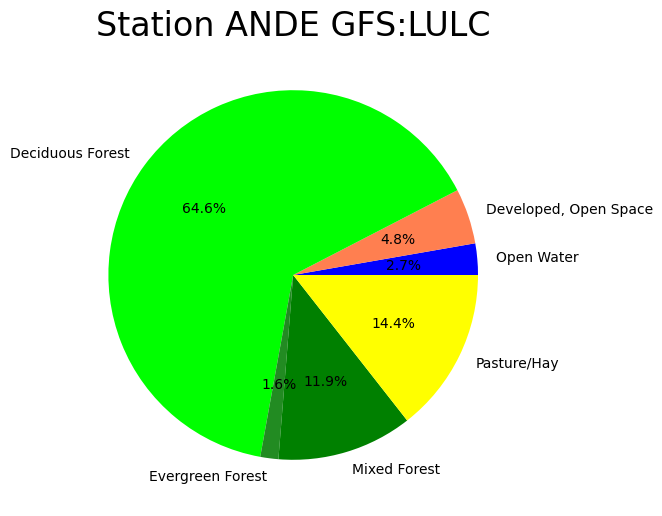

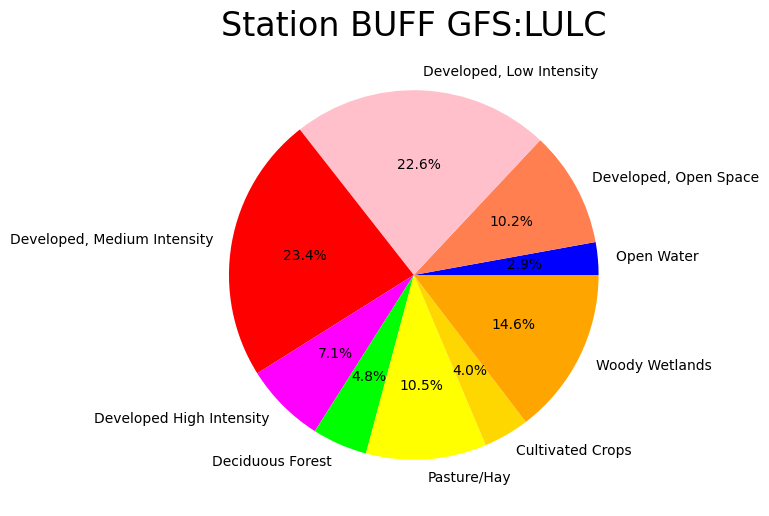

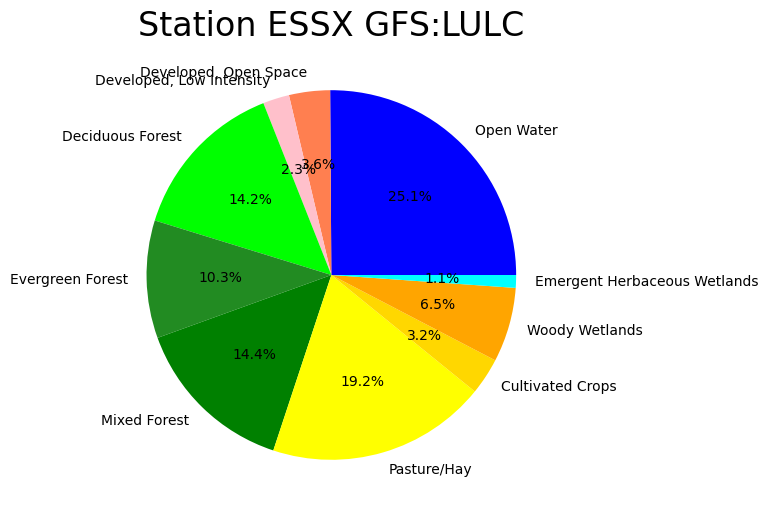

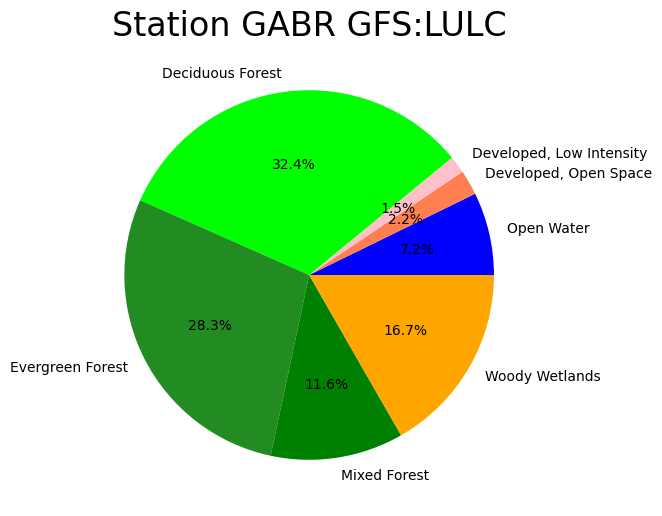

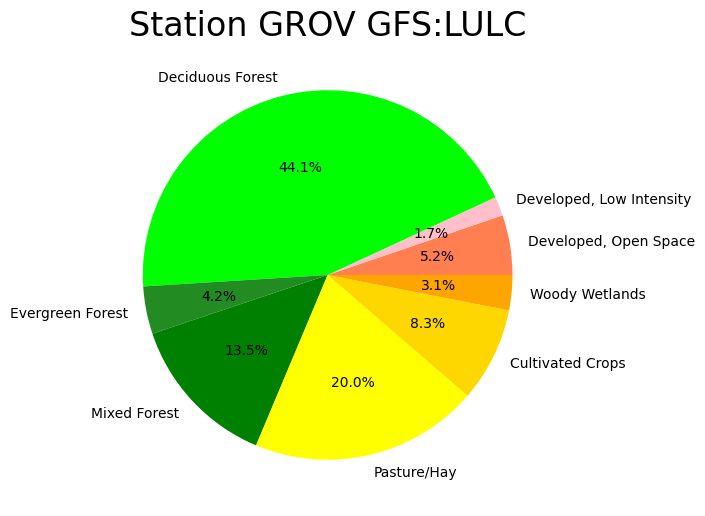

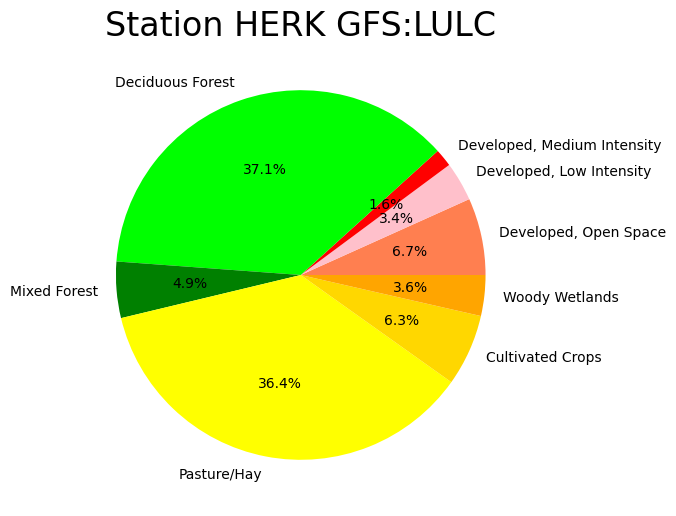

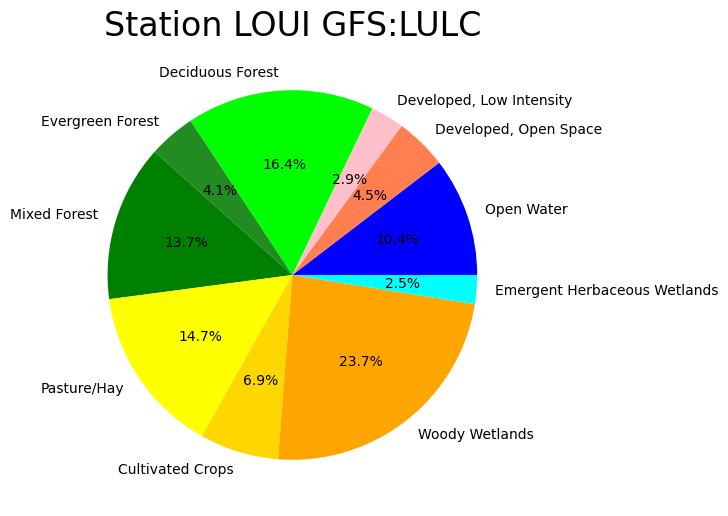

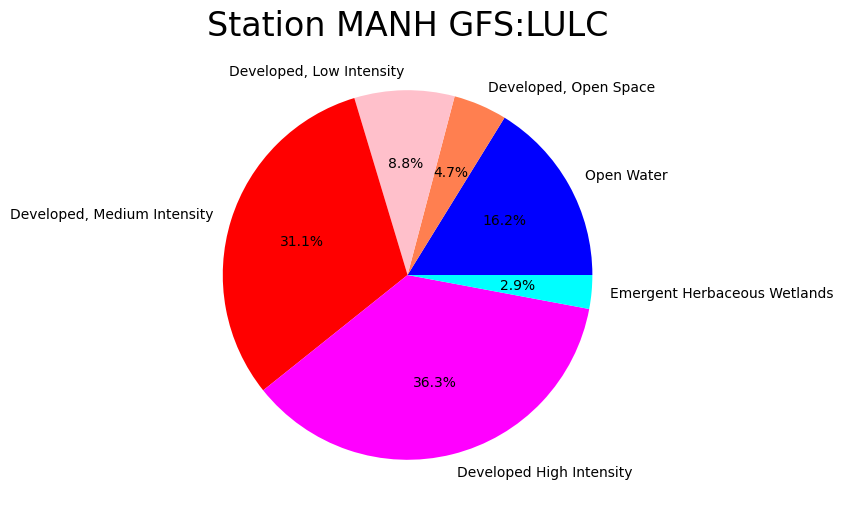

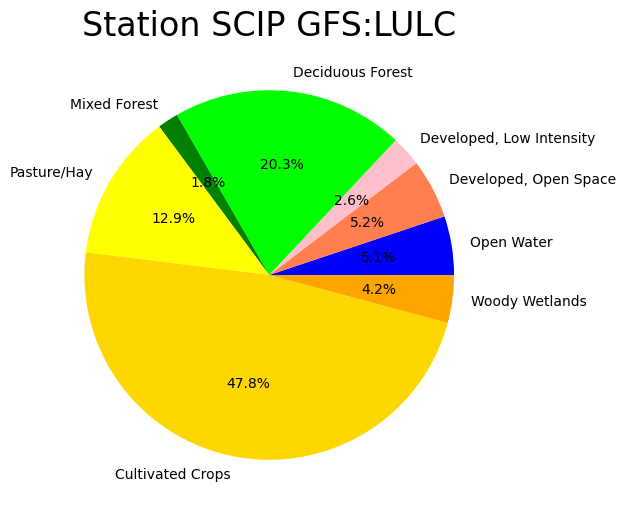

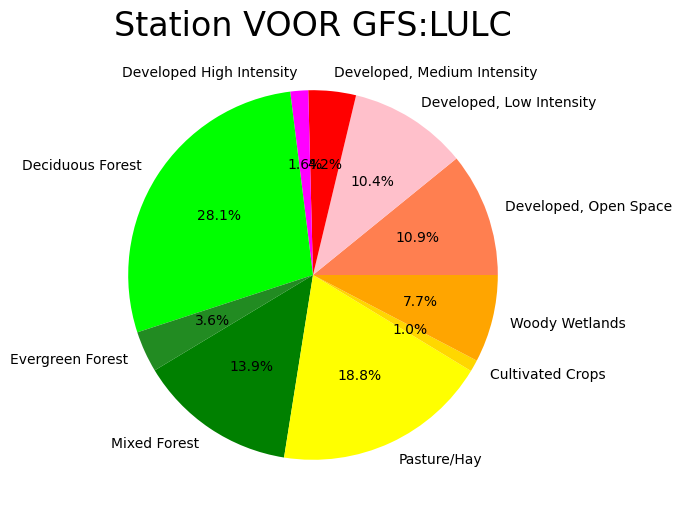

In [259]:
row_f = create_pie_charts(lulc_df)

In [ ]:
row_f